## Algoritmo kNN (k-Nearest Neighbors)

O **kNN** é um algoritmo de aprendizado supervisionado utilizado tanto para **classificação** quanto para **regressão**. Ele é baseado na ideia de que dados semelhantes estão próximos uns dos outros no espaço de características.

### Como o kNN Funciona

1. **Definição do valor de k**: O primeiro passo é determinar o número de vizinhos mais próximos a serem considerados (k). O valor de k deve ser escolhido com cuidado, pois um k muito pequeno pode levar a um modelo instável, enquanto um k muito grande pode suavizar demais a decisão.
  
2. **Métrica de Distância**: O kNN utiliza uma métrica de distância para encontrar os vizinhos mais próximos. As métricas comuns incluem a distância Euclidiana e a distância de Manhattan. A escolha da métrica pode influenciar o desempenho do modelo.

### Métricas de Avaliação para kNN

Para **classificação**, as seguintes métricas são usadas para avaliar o desempenho do modelo:

- **Matriz de Confusão**: Mostra a contagem de previsões corretas e incorretas, categorizadas por classe.
- **Curvas ROC e AUC**: A Curva ROC (Receiver Operating Characteristic) ilustra o desempenho do classificador em diferentes limiares de decisão, e a AUC (Área Under the Curve) fornece uma medida da capacidade do modelo em distinguir entre classes.
- **Erro de Classificação em Função de k**: Avalia como a mudança no valor de k afeta a taxa de erro do modelo.
- **Visualização da Fronteira de Decisão**: Ajuda a entender como o modelo separa diferentes classes no espaço de características.

Para **regressão**, o kNN prediz um valor contínuo baseado na média (ou mediana) dos k vizinhos mais próximos.

### Vantagens do kNN

- **Facilidade de Entendimento e Implementação**: O kNN é intuitivo e simples de implementar.
- **Sem Treinamento Explícito**: Não requer um processo de treinamento separado, pois a "aprendizagem" ocorre durante a previsão.
- **Flexibilidade**: Pode ser usado para ambos os problemas de classificação e regressão.

### Desvantagens do kNN

- **Conjunto de Dados Deve Ser Representativo**: O desempenho do kNN pode ser comprometido se os dados de treinamento não forem representativos ou contiverem ruído.
- **Lentidão na Predição**: A predição pode ser lenta, especialmente com grandes conjuntos de dados, pois requer calcular a distância entre o ponto de teste e todos os pontos de treinamento.


# Criar dados, definir funções básicas e Matriz de Confusão

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Gerar dados sintéticos
np.random.seed(42)  # Para reprodutibilidade

# Definir o número total de amostras
num_total_samples = 1000

# Gerar características (potência, peso e consumo)
potencia = np.random.uniform(50, 300, num_total_samples)
peso = np.random.uniform(800, 3000, num_total_samples)
consumo = np.random.uniform(5, 20, num_total_samples)

# Gerar classes (0 = Econômico, 1 = Potente)
classes = (potencia + consumo/2 > 200).astype(int)  # Simples regra para classe

# Criar DataFrame
df = pd.DataFrame({
    'Potencia': potencia,
    'Peso': peso,
    'Consumo': consumo,
    'Classe': classes
})

# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Econômico', 'Potente'], yticklabels=['Econômico', 'Potente'])
    plt.xlabel('Previsão')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()


# Curva ROC

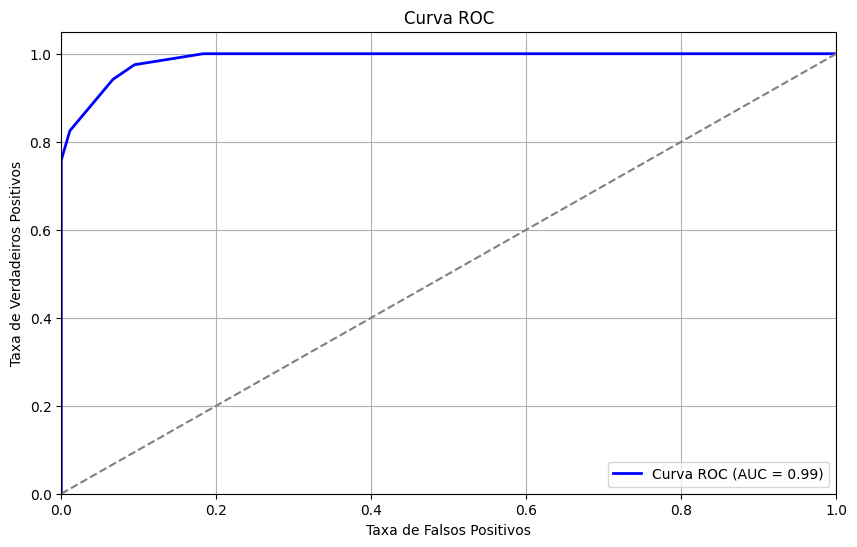

In [18]:
# Dividir o conjunto de dados em treinamento e teste
X = df[['Potencia', 'Peso', 'Consumo']]
y = df['Classe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o classificador kNN com k fixo
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Treinar o classificador
knn.fit(X_train, y_train)

# Fazer previsões e obter probabilidades
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plotar a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Variar o Número de k e Plotar Precisão

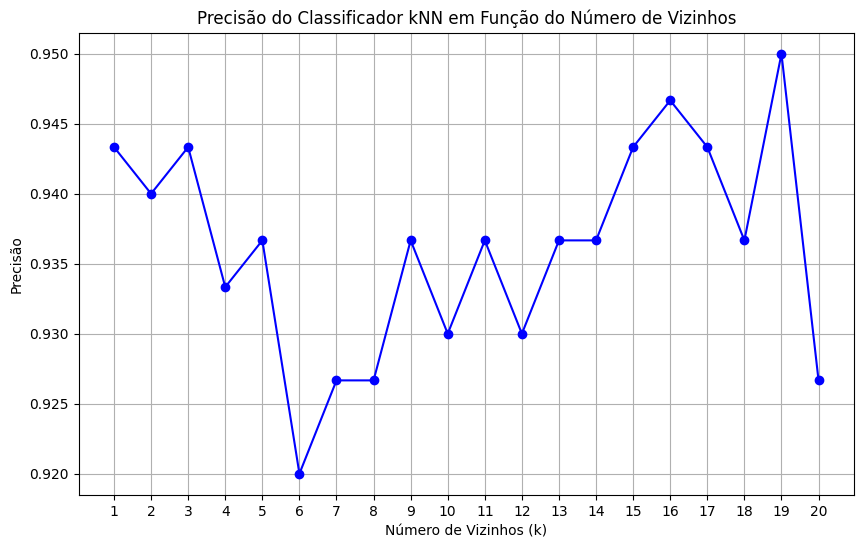

In [14]:
# Listar diferentes valores de k para testar
k_values = range(1, 21)  # Testar k de 1 a 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotar a precisão em função de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Precisão')
plt.title('Precisão do Classificador kNN em Função do Número de Vizinhos')
plt.grid(True)
plt.xticks(k_values)
plt.show()


# Variar o Tamanho do Conjunto de Treinamento e Plotar Precisão

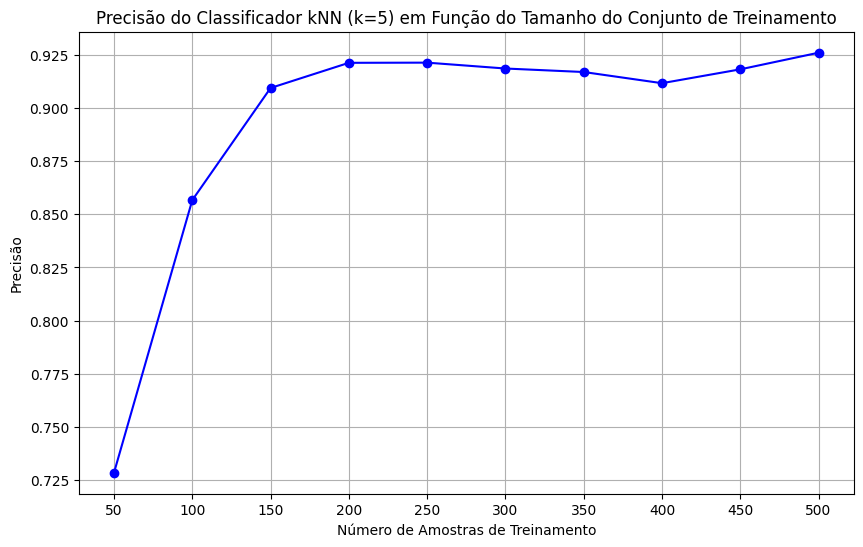

In [15]:
# Listar diferentes tamanhos de amostras de treinamento
train_sizes = range(50, 501, 50)  # Tamanhos de 50 a 500 amostras
accuracies = []

# Valor fixo de k
k = 5

for size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        df[['Potencia', 'Peso', 'Consumo']],
        df['Classe'],
        train_size=size,
        test_size=num_total_samples - size,
        random_state=42
    )

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotar a precisão em função do tamanho do treinamento
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Amostras de Treinamento')
plt.ylabel('Precisão')
plt.title('Precisão do Classificador kNN (k=5) em Função do Tamanho do Conjunto de Treinamento')
plt.grid(True)
plt.xticks(train_sizes)
plt.show()


# Fronteira de Decisão

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-16-516950a244a9>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test['Potencia'], X_test['Peso'], c=y_test, cmap='coolwarm', edgecolor='k', s=50, marker='x', label='Dados de Teste')


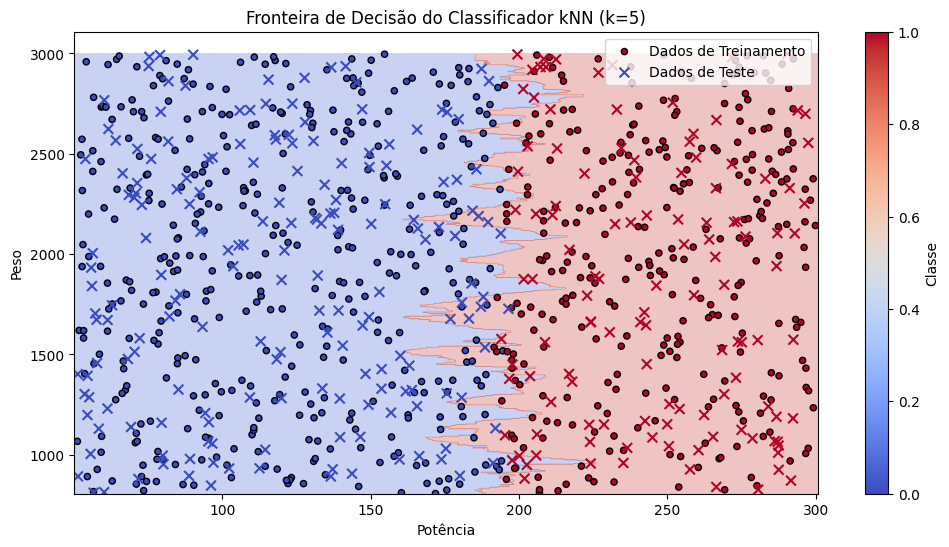

In [16]:
# Reduzir o conjunto de dados a duas características: Potência e Peso
X = df[['Potencia', 'Peso']]
y = df['Classe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o classificador kNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Criar uma grade de pontos
x_min, x_max = X_train['Potencia'].min() - 1, X_train['Potencia'].max() + 1
y_min, y_max = X_train['Peso'].min() - 1, X_train['Peso'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Prever a classe para cada ponto na grade
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar a fronteira de decisão
plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train['Potencia'], X_train['Peso'], c=y_train, cmap='coolwarm', edgecolor='k', s=20, label='Dados de Treinamento')
plt.scatter(X_test['Potencia'], X_test['Peso'], c=y_test, cmap='coolwarm', edgecolor='k', s=50, marker='x', label='Dados de Teste')
plt.xlabel('Potência')
plt.ylabel('Peso')
plt.title('Fronteira de Decisão do Classificador kNN (k=5)')
plt.legend()
plt.colorbar(label='Classe')
plt.show()


### Conclusão

A análise do classificador k-Nearest Neighbors (kNN) com dados sintéticos revelou:

1. **Matriz de Confusão**: Mostra como o modelo está classificando as amostras, ajudando a identificar áreas de melhoria.
2. **Curva ROC**: Avalia a capacidade do modelo de distinguir entre classes; um AUC alto indica bom desempenho.
3. **Precisão x Número de Vizinhos (k)**: A precisão varia com \( k \). Valores intermediários de \( k \) tendem a oferecer melhor desempenho, evitando overfitting ou underfitting.
4. **Precisão x Tamanho do Conjunto de Treinamento**: A precisão geralmente melhora com mais dados de treinamento, mas a taxa de melhoria pode diminuir após um certo ponto.
5. **Fronteira de Decisão**: Ilustra como o modelo separa as classes no espaço das características, ajudando a visualizar a eficácia da classificação.
